<a href="https://colab.research.google.com/github/kingajutrzenka/case-study/blob/main/Happiness_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Happiness Classification Dataset*

# *Import*

In [62]:
import mlcroissant as mlc
import pandas as pd

# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/priyanshusethi/happiness-classification-dataset/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
record_set_df.head()


  -  [Metadata(Happiness Classification Dataset)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


[RecordSet(uuid="happydata.csv")]


,happydata.csv/infoavail,happydata.csv/housecost,happydata.csv/schoolquality,happydata.csv/policetrust,happydata.csv/streetquality,happydata.csv/%C3%ABvents,happydata.csv/happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [63]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set()


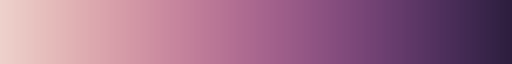

In [64]:
sns.cubehelix_palette(as_cmap=True)

# *Preprocessing*

In [65]:
df = record_set_df.copy()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   happydata.csv/infoavail      143 non-null    int64
 1   happydata.csv/housecost      143 non-null    int64
 2   happydata.csv/schoolquality  143 non-null    int64
 3   happydata.csv/policetrust    143 non-null    int64
 4   happydata.csv/streetquality  143 non-null    int64
 5   happydata.csv/%C3%ABvents    143 non-null    int64
 6   happydata.csv/happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [67]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 142
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   happydata.csv/infoavail      125 non-null    int64
 1   happydata.csv/housecost      125 non-null    int64
 2   happydata.csv/schoolquality  125 non-null    int64
 3   happydata.csv/policetrust    125 non-null    int64
 4   happydata.csv/streetquality  125 non-null    int64
 5   happydata.csv/%C3%ABvents    125 non-null    int64
 6   happydata.csv/happy          125 non-null    int64
dtypes: int64(7)
memory usage: 7.8 KB


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
happydata.csv/infoavail,125.0,4.296,0.813436,1.0,4.0,4.0,5.0,5.0
happydata.csv/housecost,125.0,2.560,1.110071,1.0,2.0,3.0,3.0,5.0
happydata.csv/schoolquality,125.0,3.232,0.984853,1.0,3.0,3.0,4.0,5.0
happydata.csv/policetrust,125.0,3.688,0.910654,1.0,3.0,4.0,4.0,5.0
happydata.csv/streetquality,125.0,3.552,1.174020,1.0,3.0,4.0,4.0,5.0
happydata.csv/%C3%ABvents,125.0,4.184,0.874219,1.0,4.0,4.0,5.0,5.0
happydata.csv/happy,125.0,0.504,0.501996,0.0,0.0,1.0,1.0,1.0


In [69]:
df.columns

Index(['happydata.csv/infoavail', 'happydata.csv/housecost',
       'happydata.csv/schoolquality', 'happydata.csv/policetrust',
       'happydata.csv/streetquality', 'happydata.csv/%C3%ABvents',
       'happydata.csv/happy'],
      dtype='object')

In [70]:
df.columns = df.columns.str.split("/").str[-1]
df.columns

Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', '%C3%ABvents', 'happy'],
      dtype='object')

In [71]:
data = df.drop('happy', axis=1)
target = df['happy']
data

,infoavail,housecost,schoolquality,policetrust,streetquality,%C3%ABvents
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
5,5,5,3,5,5,5
...,...,...,...,...,...,...
137,5,2,3,4,4,3
138,5,3,3,1,3,5
139,5,2,3,4,2,5
141,4,3,3,4,4,5


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    stratify=target,
                                                    random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(93, 6)
(32, 6)
(93,)
(32,)


# *Model*

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [75]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)
print(y_pred[:30])
print(y_prob[:30])

[0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1]
[[0.77128483 0.22871517]
 [0.28288967 0.71711033]
 [0.33171987 0.66828013]
 [0.4929715  0.5070285 ]
 [0.56851708 0.43148292]
 [0.6151746  0.3848254 ]
 [0.51998002 0.48001998]
 [0.58943039 0.41056961]
 [0.27766772 0.72233228]
 [0.61816997 0.38183003]
 [0.73061857 0.26938143]
 [0.27031053 0.72968947]
 [0.19945805 0.80054195]
 [0.16587553 0.83412447]
 [0.74038424 0.25961576]
 [0.2498955  0.7501045 ]
 [0.60322311 0.39677689]
 [0.56851708 0.43148292]
 [0.60636291 0.39363709]
 [0.24782058 0.75217942]
 [0.32080482 0.67919518]
 [0.44300084 0.55699916]
 [0.87818636 0.12181364]
 [0.28773685 0.71226315]
 [0.12657937 0.87342063]
 [0.41593339 0.58406661]
 [0.51150979 0.48849021]
 [0.95666536 0.04333464]
 [0.50538559 0.49461441]
 [0.2430266  0.7569734 ]]


# *Model evaluation*

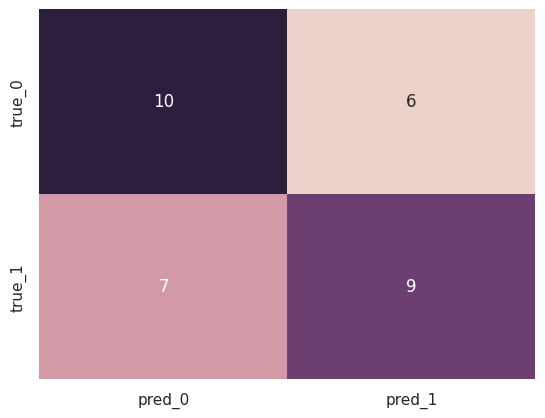

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)

def plot_cm_sns(cm):
    df = pd.DataFrame(cm, index=['true_0','true_1'], columns=['pred_0','pred_1'])
    sns.heatmap(df, annot=True, cbar=False, cmap=sns.cubehelix_palette(as_cmap=True))
    plt.show()

plot_cm_sns(cm)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.62      0.61        16
           1       0.60      0.56      0.58        16

    accuracy                           0.59        32
   macro avg       0.59      0.59      0.59        32
weighted avg       0.59      0.59      0.59        32

